## 1단계 데이터 불러오기

In [1]:
## 인터넷으로 불러와서
import pandas as pd
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";", header =0)

## type이라는 컬럼을 만들어서 red / white구분하게 만들기
whitewine["type"] = "white"
whitewine.head(3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


In [2]:
whitewine.shape

(4898, 13)

In [3]:
## 인터넷으로 불러와서
import pandas as pd
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";", header =0)

## type이라는 컬럼을 만들어서 red / white구분하게 만들기
redwine["type"] = "red"
redwine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
redwine.shape

(1599, 13)

## 2단계 데이터 합치기

In [6]:
## 두개의 분리된 데이터를 열로 합쳐서 wine이라는 데이터 만듬
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [7]:
## wine의 항목 type중에 value에 따라 몇개씩 잇나?
wine["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [8]:
## columns에 빈공간이 많군.. 데이터 돌리다가 에러발생위험 큼
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [9]:
## 그럼 그걸 _ 로 바꿔주자고
wine.columns = wine.columns.str.replace(" ", "_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
## wine 데이터의 통계를 한번보까
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
## 그럼 우리가 처리할 퀄리티만 통계를 한번보까
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [12]:
### 오 wine데이터의 quality항목의 unique값은 아래와 같구나
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [13]:
## ## wine의 항목 type중에 value에 따라 몇개씩 잇나?
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
## wine데이터에서 type끼리 묶어서 -> quality항목의 통계를 볼까
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [15]:
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type")

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


import seaborn as sns
import matplotlib.pyplot as plt## 그룹의 분포와 히스토그램, t검정하기

C:\Users\Mr. Jae-Hong Seo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


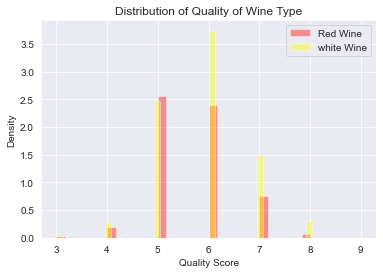

In [16]:
## wine 데이터에서 type은 red고 loc를 써서 그중에 quality데이터만 가져와라~
### red_q = wine[wine["type"] == "red"],["quality"] 라고 표현해도 됨..loc없이
red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white"]["quality"]

## 그래프 그릴려고 import함
import seaborn as sns
import matplotlib.pyplot as plt

## 이건 밀도함수 distplot 를 그리는거.. norm_hist말고 kde에 true하면 선형으로 나옴
sns.set_style("darkgrid")
sns.distplot(red_q, norm_hist = True, kde=False, color = "red", label="Red Wine")
sns.distplot(white_q, norm_hist = True, kde=False, color = "yellow", label="white Wine")
plt.title("Distribution of Quality of Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend();

## 와인종류별 품질 차이의 통계적 유의성 검정 t-test ,P -value

# p-value가 작아질수록 가정하는 주장에 대한 신뢰도가 올라가게 된다

# Essentially, a t-test allows us to compare the average values of the two data sets and determine if they came from the same population

# Higher values of the t-value, also called t-score, indicate that a large difference exists between the two sample sets.


In [17]:
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [18]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
"t-stat:{:.3f}, p-value:{:.4f}".format(t_stat, p_value)

't-stat:-9.686, p-value:0.0000'

변수들 사이의 상관계수 계산하기

In [19]:
## corr은 모든 변수 쌍 사이의 상관계수를 계산
## -1<r<1 이며 -1가까우면 음의 상관 1이면 양의상관, 0에 가까우면 상관없음
wine_corr = wine.corr()
wine.corr

<bound method DataFrame.corr of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [20]:
## 그중에서 양의 상관만 볼려면
wine_corr.loc[wine_corr["quality"]>0, "quality"]

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [21]:
## 그중에서 음의 상관만 볼려면
wine_corr.loc[wine_corr["quality"]<0, "quality"]

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

In [22]:
red_sample = wine.loc[wine["type"]=="red", :]
white_sample = wine.loc[wine["type"]=="white", :]

In [23]:
import numpy as np
red_idx = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

In [24]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
1070,9.3,0.330,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,7,red
771,9.4,0.685,0.26,2.4,0.082,23.0,143.0,0.99780,3.28,0.55,9.4,5,red
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6,red
534,10.0,0.480,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,6,red
233,6.9,0.520,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,5,red


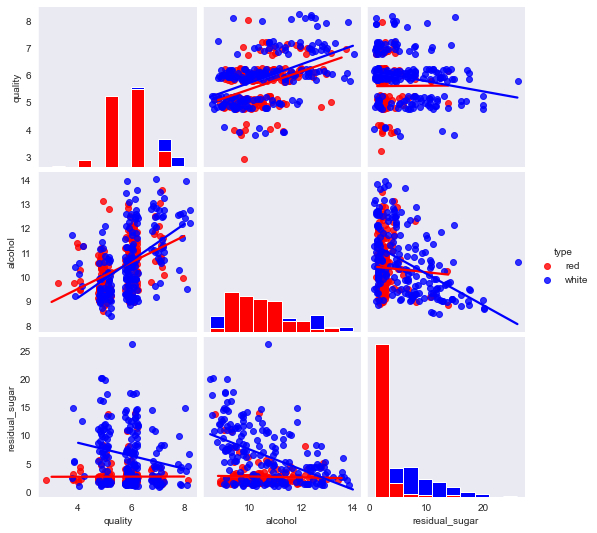

In [25]:
## pairplot 
sns.set_style("dark")
sns.pairplot(wine_sample, vars=["quality", "alcohol", "residual_sugar"],
             kind="reg" , plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter":0.25},
             diag_kind="hist", diag_kws={"bins": 10, "alpha":1},
             hue="type", palette= dict(red="red", white="blue", markers=["o", "s"]));

## wine데이터에 선형회기 모델 적용하기

In [26]:
## 지금은 선형회기에서 param중 fit_intercept (절편=선형의기울기을 사용) 적용
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [27]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [28]:
## wine 데이터에서 type과 quality만 지우고(drop) X를 만듬
X = wine.drop(["type","quality"], axis=1)
X.shape

(6497, 11)

In [29]:
## y값도 지정
y = wine.quality
y.shape

(6497,)

In [30]:
## 훈련과 테스트 데이터 분리
## test_size=0.2를 안줘서 defalt인  0.25됨
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4872, 11), (4872,), (1625, 11), (1625,))

In [31]:
## 데이터 적합해서 훈련 시키기
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

print("coef =", model.coef_)
print("_"*30)
print("intercept =", model.intercept_)

coef = [ 5.55618691e-02 -1.29945358e+00 -1.08205046e-01  4.52070539e-02
 -3.95901596e-01  5.76479819e-03 -2.47760359e-03 -5.30023471e+01
  3.50283862e-01  7.49149475e-01  2.78530060e-01]
______________________________
intercept = 54.05800385466541


 자료해석 -
 변수의 개수(11개)만큼 coef가 표시됨. 특히 이 숫자는 영향력지수를 말함
 뒤에서 두번째의 변수(알콜)이 영향력이 7.49149475e-01 로 제일높음
 intercept(절편 = 선형의기울기)는 54.05800385466541

In [32]:
## 새로운 데이터(변수가 11개니까 11개 데이터) 가 들어왔을때 품질은? 
## 즉 이 새로운 데이터로는 품질이 5.27273597 이군
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])
model.predict(np.reshape(newdata,(1, 11)))

array([5.27273597])

In [33]:
## x_test데이터로 얼마나 잘 맞췄는지 예측해보기_ 1단계
y_pred = model.predict(X_test)
y_pred.shape

(1625,)

In [34]:
## t_test가 얼마나 잘 맞췄는지 예측해보기 _ 2단계
## x_test의 실제결과 값인 y_real과 내가 예측해서 구한 y_pred의 차이를 봐서 
### 오정확도가 0.73 즉 73%군 하는거! 
def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real - y_pred)**2))

In [35]:
np.round(rmse(y_test, y_pred),2)

0.73

In [36]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.725

## 선형모델의 규제( 과분산 선형회귀 모델에 규제를 적용해서 오버피팅 문제를 감소 시킬려고)_Ridge / Lasso

In [107]:
# 규제가 없는경우
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.725

In [108]:
# Ridge 규제가 있는경우
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.727

In [110]:
# Lasso 규제가 있는경우
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3)

0.761